In [106]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import random
from collections import Counter
from functools import reduce
from itertools import chain
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU
from tensorflow.keras.activations import tanh, relu, sigmoid, softmax, swish
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber
import keras.utils as image

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import the Image dataset from the Google Drive

In [2]:
##### To Access the Google Drive #####
def google_drive(parameter = None):
  try:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
  except Exception as e:
    print(e.with_traceback)
  else:
    print('\nGoogle Drive access is done.\n'.title())

google_drive()

Mounted at /content/drive

Google Drive Access Is Done.



In [3]:
##### To Unzip the folder #####
def unzip_file(parameter_ = None):
  try:
    link_folder_ = '/content/drive/MyDrive/CNN Dataset/Colon Cancer.zip'
    zip_ref = zipfile.ZipFile(link_folder_, 'r')
    zip_ref.extractall()
    zip_ref.close()
  except Exception as e:
    print(e.with_traceback)
  else:
    print('Upzip is done succesfully'.title())

##### Call the Unzip function #####
unzip_file()

Upzip Is Done Succesfully


In [4]:
##### Directory of the folder #####
_DIRECTORY  = '/content/Colon Cancer/colon_cancer'
##### Number of categories of the Colon Cancer Dataset #####
_CATEGORIES = ['0_normal', '1_ulcerative_colitis', '2_polyps', '3_esophagitis']
##### Create an empty list named data there all the image array will be stored with their category #####
data = []

##### Make the join with the DIRECTORY & CATEGORIES #####
for each_category in _CATEGORIES:
  ##### Make the each folder path #####
  folder_path_ = os.path.join(_DIRECTORY, each_category)
  ##### Merge & Take dataset by category wise #####
  for image_ in os.listdir(folder_path_):
    image_folder_ = os.path.join(folder_path_, image_)
    ##### Make that image into array size #####
    image_array_  = cv2.imread(image_folder_)
    ##### Make the images into a particular shape #####
    image_array_ = cv2.resize(image_array_, (150, 150))
    ##### Create the target class #####
    target_class_= _CATEGORIES.index(each_category)

    ##### Append the data into 'data' list with their target name #####
    data.append([image_array_, target_class_])

  print('{} category of target class is done'.title().format(each_category.split('_')[1]),'\n')
  print('*'*60)

print('Done with all the categories in the dataset.'.capitalize())

normal Category Of Target Class Is Done 

************************************************************
ulcerative Category Of Target Class Is Done 

************************************************************
polyps Category Of Target Class Is Done 

************************************************************
esophagitis Category Of Target Class Is Done 

************************************************************
Done with all the categories in the dataset.


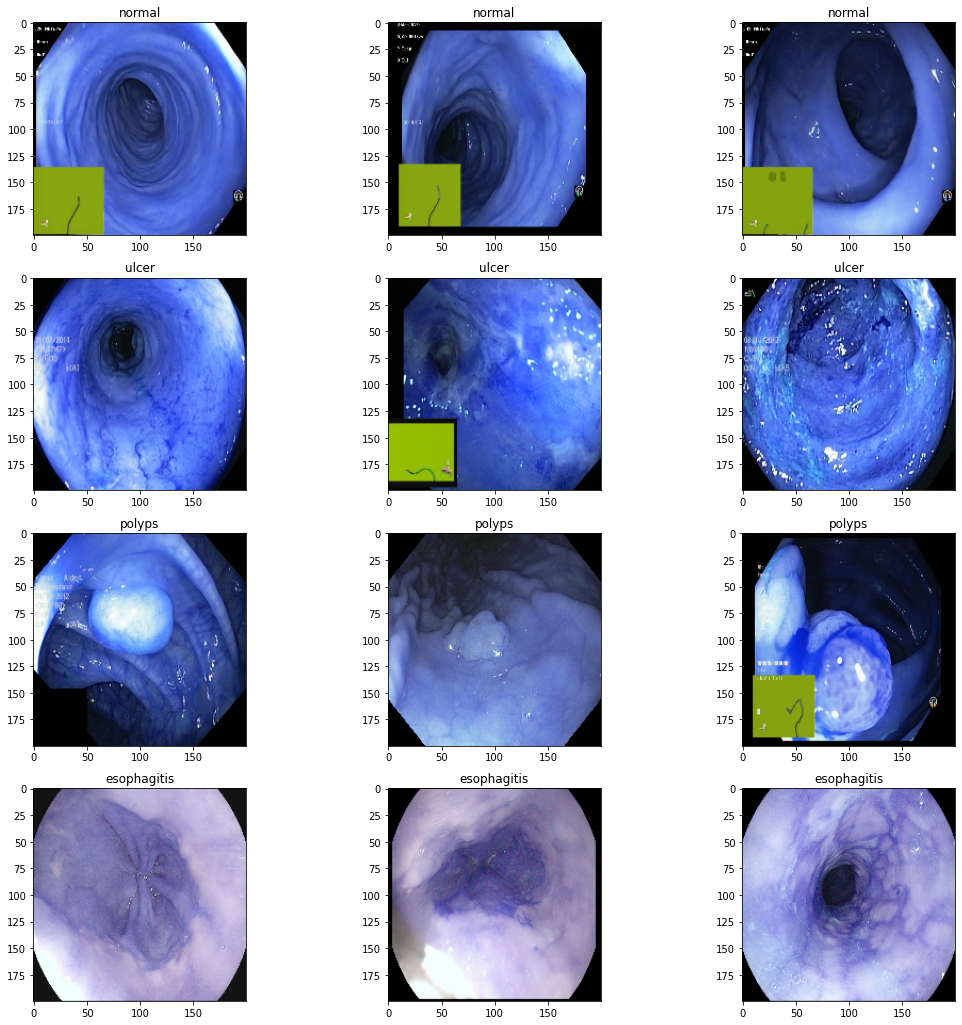

In [5]:
##### Plot some of the Image datasets #####
normal_, ulcerative_colitis, polyps, estophagitis = '/content/Colon Cancer/colon_cancer/0_normal',\
                                                   '/content/Colon Cancer/colon_cancer/1_ulcerative_colitis',\
                                                   '/content/Colon Cancer/colon_cancer/2_polyps',\
                                                  '/content/Colon Cancer/colon_cancer/3_esophagitis'

normal_, ulcerative_colitis, polyps, estophagitis = os.listdir(normal_)[0:3],\
                                                    os.listdir(ulcerative_colitis)[0:3],\
                                                    os.listdir(polyps)[0:3],\
                                                    os.listdir(estophagitis)[0:3]

directoty_ = ['/content/Colon Cancer/colon_cancer/0_normal',\
              '/content/Colon Cancer/colon_cancer/1_ulcerative_colitis',\
              '/content/Colon Cancer/colon_cancer/2_polyps',\
              '/content/Colon Cancer/colon_cancer/3_esophagitis']

image_list_ = []
for index_, subset_image in enumerate([normal_, ulcerative_colitis, polyps, estophagitis]):
  for image_ in subset_image:
    image_list_.append(directoty_[index_]+"/"+image_)

##### Plot the images to analysis #####
_, axs = plt.subplots(4, 3, figsize=(18, 18))
axs = axs.flatten()

for img, ax in zip(image_list_, axs):
  ax.set_title(img.split('_')[-2])
  ax.imshow(cv2.resize(cv2.imread(img), (200, 200)))
plt.show()

In [6]:
##### shuffle the data in order to prevent the biasness #####
random.shuffle(data)

In [7]:
##### Split the dataset into independent and dependent varibales #####
X, y = [], []

for (data_, target_) in data:
  X.append(data_)
  y.append(target_)

print('Independent and Dependent varibale is done'.capitalize())

Independent and dependent varibale is done


In [8]:
##### Convert the independent and dependent varibale into numpy array #####
X_numpy = np.array(X)
y_numpy = np.array(y)

##### Normalized the dataset so that during training the ditribution would remain same #####

X_numpy = (X_numpy/ 255)

print('Converted into Numpy array and normalization is done.'.title())

Converted Into Numpy Array And Normalization Is Done.


In [9]:
##### Split the dataset into train and test #####
print('Before splitting the shape of X is = {}'.format(X_numpy.shape),'\n')
print('Before splitting the shape of y is = {}'.format(y_numpy.shape),'\n')
print('*'*120,'\n')

X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size = 0.25, random_state = 42, shuffle = True)

print('The shape of X train of the dataset is = {}'.format(X_train.shape),'\n')
print('The shape of y train of the dataset is = {}'.format(y_train.shape),'\n')
print('The shape of X test  of the dataset is = {}'.format(X_test.shape),'\n')
print('The shape of y test  of the dataset is = {}'.format(y_test.shape),'\n')

Before splitting the shape of X is = (4000, 150, 150, 3) 

Before splitting the shape of y is = (4000,) 

************************************************************************************************************************ 

The shape of X train of the dataset is = (3000, 150, 150, 3) 

The shape of y train of the dataset is = (3000,) 

The shape of X test  of the dataset is = (1000, 150, 150, 3) 

The shape of y test  of the dataset is = (1000,) 



Build the own model and evaluate the performance

In [10]:
##### Create a sequential model #####
model = Sequential()

##### Create first Convolutional Layer with 64 filters with Stride = 1 #####
model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', \
                 kernel_initializer = 'he_normal', activation = 'relu', input_shape = X_numpy.shape[1:]))

##### Use the MaxPooling Layer #####
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))

##### Create second Convolutional Layer with 64 filters with Stride = 1 #####
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'valid', \
                 kernel_initializer = 'he_normal', activation = 'relu'))

##### Use the MaxPooling Layer #####
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))


##### Do the flatten Layer #####
model.add(Flatten())


##### Create first fully connected layer with 128 nuerons #####
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

##### Create second hidden layer with 64 neurons #####
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal'))

##### Use the dropout layer with p value = 0.6 #####
model.add(Dropout(0.6))

##### Create the output layer #####
model.add(Dense(units = 4, activation = 'softmax'))

##### Compile the model #####
model.compile(optimizer = 'Adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [11]:
##### Show the model summary #####
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [12]:
history_ = model.fit(x = X_train, y = y_train, batch_size = 64, epochs = 100, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
47/47 [==============================] - 13s 85ms/step - loss: 3.2925 - accuracy: 0.6770 - val_loss: 1.3565 - val_accuracy: 0.9490
Epoch 2/100
47/47 [==============================] - 3s 58ms/step - loss: 1.1546 - accuracy: 0.9250 - val_loss: 0.8767 - val_accuracy: 0.9340
Epoch 3/100
47/47 [==============================] - 3s 59ms/step - loss: 0.7763 - accuracy: 0.9497 - val_loss: 0.5952 - val_accuracy: 0.9690
Epoch 4/100
47/47 [==============================] - 3s 59ms/step - loss: 0.5702 - accuracy: 0.9473 - val_loss: 0.5173 - val_accuracy: 0.9380
Epoch 5/100
47/47 [==============================] - 3s 59ms/step - loss: 0.4486 - accuracy: 0.9523 - val_loss: 0.3851 - val_accuracy: 0.9580
Epoch 6/100
47/47 [==============================] - 3s 59ms/step - loss: 0.3617 - accuracy: 0.9593 - val_loss: 0.3139 - val_accuracy: 0.9680
Epoch 7/100
47/47 [==============================] - 3s 59ms/step - loss: 0.3186 - accuracy: 0.9610 - val_loss: 0.3010 - val_accuracy: 0.9620
Epoch

In [13]:
##### Show the performance of this model #####
predicted_ = model.predict(X_test)

predicted_ = np.argmax(predicted_, axis = 1)
print('\nEvalution of model in Average = Macro.\n\n')
print('The accuracy score of this dataset is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision score of this dataset is = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The recall score of this dataset is = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The F1 score of this dataset is = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n'))

print('*'*120)

print('\nEvalution of model in Average = Micro.\n\n')
print('The accuracy score of this dataset is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision score of this dataset is = {} '.format(precision_score(predicted_, y_test, average = 'micro'),'\n'))
print('The recall score of this dataset is = {} '.format(recall_score(predicted_, y_test, average = 'micro'),'\n'))
print('The F1 score of this dataset is = {} '.format(f1_score(predicted_, y_test, average = 'micro'),'\n'))

32/32 [==============================] - 1s 12ms/step

Evalution of model in Average = Macro.


The accuracy score of this dataset is  = 0.963 
The precision score of this dataset is = 0.9614863914480625 
The recall score of this dataset is = 0.9635796198282979 
The F1 score of this dataset is = 0.9611627641449483 
************************************************************************************************************************

Evalution of model in Average = Micro.


The accuracy score of this dataset is  = 0.963 
The precision score of this dataset is = 0.963 
The recall score of this dataset is = 0.963 
The F1 score of this dataset is = 0.963 


In [14]:
##### Classification report of this dataset #####
print(classification_report(predicted_, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       0.97      0.89      0.93       258
           2       0.87      0.99      0.93       213
           3       1.00      0.98      0.99       258

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.97      0.96      0.96      1000



[[270   1   0   0]
 [  0 230  28   0]
 [  0   3 210   0]
 [  0   2   3 253]]
************************************************************************************************************************ 




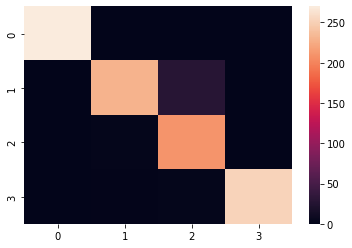

In [15]:
##### Show the confution matrix of this model for evalution #####
print(confusion_matrix(predicted_, y_test))

print('*'*120,'\n\n')

sns.heatmap(confusion_matrix(predicted_, y_test))
plt.show()

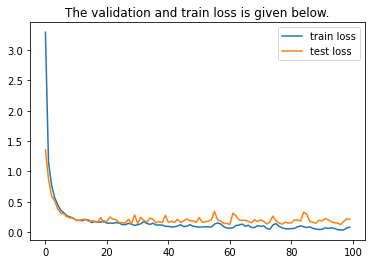

************************************************************************************************************************ 



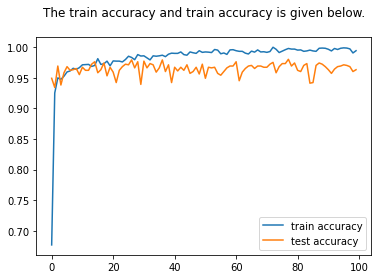

In [16]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss is given below.')
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*120,'\n')

plt.title('The train accuracy and train accuracy is given below.\n')
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 59ms/step


'Esophagitis'

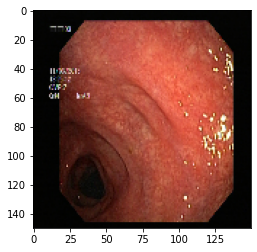

In [17]:
import keras.utils as image
class colon_cancer:

  def __init__(self, image_):
    self.image = image_

  def prediction(self):
    ##### Load the image #####
    Image_ = image.load_img(self.image, target_size = (150, 150))
    plt.imshow(Image_)
    ##### Convert this image to Numpy array #####
    Image_array_ = image.img_to_array(Image_)
    ##### Normalized the array #####
    Image_array_numpy = (Image_array_/255)
    test_data = np.expand_dims(Image_array_numpy, axis = 0)
    predicted_ =  model.predict(test_data)
    predicted_ = np.argmax(predicted_, axis = 1)
    if predicted_[0] == 0:
      return 'Normal'
    elif predicted_[0] == 1:
      return 'Ulcer'
    elif predicted_[0] == 2:
      return 'Polyps'
    else:
      return 'Esophagitis'

col = colon_cancer('/content/Colon Cancer/colon_cancer/1_ulcerative_colitis/test_ulcer_ (105).jpg')
col.prediction()

Use KFold - 5 Cross Validation to evaluate the model and prevent the overfitting

In [18]:
##### Declare KFold - 5 Cross Validation #####
KFold_ = KFold(n_splits = 5, random_state = 42, shuffle = True)
##### Declare the performance matrix #####
count_, accuracy_score_, precision_score_, recall_score_, f1_score_, history_list_ = 1, [], [], [], [], []

##### Split the dataset using KFold - 5 #####
for train_index_, test_index_ in KFold_.split(X_numpy):

  print('# of Cross Validation {} is running.\n'.format(count_))

  ##### Split the dataset into train and test #####
  X_train, X_test = X_numpy[train_index_], X_numpy[test_index_]
  y_train, y_test = y_numpy[train_index_], y_numpy[test_index_]

  ##### Train the model #####
  history_ = model.fit(x = X_train, y = y_train, batch_size = 64, epochs = 100, validation_data = (X_test, y_test), verbose = 1)

  ##### Predict the model #####
  predicted_ = model.predict(X_test)
  predicted_ = np.argmax(predicted_, axis = 1)

  print('\nEvalution of model in Average = Macro.\n\n')
  print('The accuracy score of this dataset is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
  print('The precision score of this dataset is = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
  print('The recall score of this dataset is = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
  print('The F1 score of this dataset is = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n'))

  print('*'*120)

  print('\nEvalution of model in Average = Micro.\n\n')
  print('The accuracy score of this dataset is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
  print('The precision score of this dataset is = {} '.format(precision_score(predicted_, y_test, average = 'micro'),'\n'))
  print('The recall score of this dataset is = {} '.format(recall_score(predicted_, y_test, average = 'micro'),'\n'))
  print('The F1 score of this dataset is = {} '.format(f1_score(predicted_, y_test, average = 'micro'),'\n'))

  #### Appending the performance matrix #####
  accuracy_score_.append(accuracy_score(predicted_, y_test))
  precision_score_.append(precision_score(predicted_, y_test, average = 'macro'))
  recall_score_.append(recall_score(predicted_, y_test, average = 'macro'))
  f1_score_.append(f1_score(predicted_, y_test, average = 'macro'))

  ##### Increament the count #####
  count_+= 1

# of Cross Validation 1 is running.

Epoch 1/100
50/50 [==============================] - 3s 60ms/step - loss: 0.0940 - accuracy: 0.9925 - val_loss: 0.2091 - val_accuracy: 0.9600
Epoch 2/100
50/50 [==============================] - 3s 57ms/step - loss: 0.0964 - accuracy: 0.9941 - val_loss: 0.2458 - val_accuracy: 0.9613
Epoch 3/100
50/50 [==============================] - 3s 57ms/step - loss: 0.0769 - accuracy: 0.9956 - val_loss: 0.2142 - val_accuracy: 0.9688
Epoch 4/100
50/50 [==============================] - 3s 57ms/step - loss: 0.0682 - accuracy: 0.9966 - val_loss: 0.1953 - val_accuracy: 0.9688
Epoch 5/100
50/50 [==============================] - 3s 56ms/step - loss: 0.0742 - accuracy: 0.9944 - val_loss: 0.2073 - val_accuracy: 0.9663
Epoch 6/100
50/50 [==============================] - 3s 57ms/step - loss: 0.0624 - accuracy: 0.9962 - val_loss: 0.1781 - val_accuracy: 0.9725
Epoch 7/100
50/50 [==============================] - 3s 57ms/step - loss: 0.0724 - accuracy: 0.9947 - val_loss:

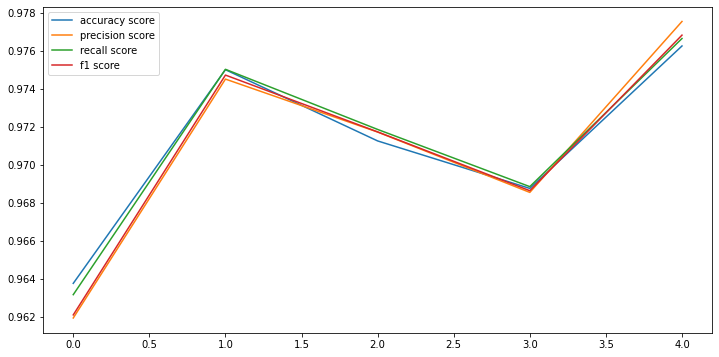

In [26]:
##### Plot the performance ##### 
plt.figure(figsize = (12, 6))
plt.plot(accuracy_score_, label = 'accuracy score')
plt.plot(precision_score_, label = 'precision score')
plt.plot(recall_score_, label = 'recall score')
plt.plot(f1_score_, label = 'f1 score')
plt.legend()
plt.show()

In [21]:
##### Check the performance of KFold - 5 #####
print('The list of accuracy score is {}'.format(accuracy_score_),'\n')
print('The list of precision score is {}'.format(precision_score_),'\n')
print('The list of recall score is {}'.format(recall_score_),'\n')
print('The list of f1_score score is {}'.format(f1_score_),'\n')

print('*'*120,'\n')

print('The mean accuracy is  = {}'.format(np.array(accuracy_score_).mean(),'\n'))
print('The mean precision is = {}'.format(np.array(precision_score_).mean(),'\n'))
print('The mean recall is = {}'.format(np.array(recall_score_).mean(),'\n'))
print('The mean f1_score is = {}'.format(np.array(f1_score_).mean(),'\n'))

The list of accuracy score is [0.96375, 0.975, 0.97125, 0.96875, 0.97625] 

The list of precision score is [0.9619276424975907, 0.9745057416406341, 0.9717174994592257, 0.9685394101857623, 0.9775399972651443] 

The list of recall score is [0.9631550799213914, 0.9750205895560349, 0.9718549382987433, 0.9688427486292067, 0.9766424466957211] 

The list of f1_score score is [0.9620896401275051, 0.9747173270957583, 0.9717255666667226, 0.9686293963372049, 0.976820714581642] 

************************************************************************************************************************ 

The mean accuracy is  = 0.9710000000000001
The mean precision is = 0.9708460582096714
The mean recall is = 0.9711031606202194
The mean f1_score is = 0.9707965289617666


Use Transfer Learning Techine to Evaluate the model performance
1. VGG - 16
2. ResNet 
3. InceptionNet50

In [38]:
##### Call the transfer learning - VGG16 #####
from tensorflow.keras.applications import VGG16

##### call the VGG16 with the imagenet weights #####
VGG16_ = VGG16(include_top = False, weights = 'imagenet', input_shape = X_numpy.shape[1:])

##### Show the summary of VGG16 #####
VGG16_.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [39]:
##### Set the trainable parameters = False for freezing the weights and bias #####
VGG16_.trainable = False

##### Create the sequential model #####
model = Sequential()

##### Add this VGG16 into the sequential model #####
model.add(VGG16_)

##### Flatten the model for the fully connected layer #####
model.add(Flatten())

##### Create first hidden layer with 512 neurons #####
model.add(Dense(units = 512, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

##### Use the Dropout Layer with P value = 0.5 #####
model.add(Dropout(0.5))

##### Create second hidden layer with 128 neurons #####
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

##### Use the Dropout Layer with P value = 0.5 #####
model.add(Dropout(0.6))

##### Create the output layer #####
model.add(Dense(units = 4, activation = 'softmax'))


##### Compile the model and run #####
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

##### plot the model summary #####
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 4)                

In [40]:
##### Fit the model and run #####
history_ = model.fit(x = X_train, y = y_train, batch_size = 64, epochs = 20, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/20
50/50 [==============================] - 11s 199ms/step - loss: 12.4146 - accuracy: 0.5594 - val_loss: 10.4066 - val_accuracy: 0.8950
Epoch 2/20
50/50 [==============================] - 10s 195ms/step - loss: 9.4668 - accuracy: 0.7912 - val_loss: 8.2287 - val_accuracy: 0.9362
Epoch 3/20
50/50 [==============================] - 10s 200ms/step - loss: 7.6168 - accuracy: 0.8734 - val_loss: 6.7318 - val_accuracy: 0.9513
Epoch 4/20
50/50 [==============================] - 10s 200ms/step - loss: 6.3022 - accuracy: 0.9112 - val_loss: 5.6552 - val_accuracy: 0.9588
Epoch 5/20
50/50 [==============================] - 10s 198ms/step - loss: 5.3523 - accuracy: 0.9294 - val_loss: 4.8617 - val_accuracy: 0.9675
Epoch 6/20
50/50 [==============================] - 10s 194ms/step - loss: 4.6402 - accuracy: 0.9384 - val_loss: 4.2607 - val_accuracy: 0.9725
Epoch 7/20
50/50 [==============================] - 10s 192ms/step - loss: 4.0853 - accuracy: 0.9450 - val_loss: 3.7796 - val_accuracy: 0.97

In [42]:
##### Show the performance of this model #####
predicted_ = model.predict(X_test)

predicted_ = np.argmax(predicted_, axis = 1)
print('\nEvalution of model in Average = Macro in VGG16.\n\n')
print('The accuracy score of this dataset is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision score of this dataset is = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The recall score of this dataset is = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The F1 score of this dataset is = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n'))

print('*'*120)

print('\nEvalution of model in Average = Micro in VGG16.\n\n')
print('The accuracy score of this dataset is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision score of this dataset is = {} '.format(precision_score(predicted_, y_test, average = 'micro'),'\n'))
print('The recall score of this dataset is = {} '.format(recall_score(predicted_, y_test, average = 'micro'),'\n'))
print('The F1 score of this dataset is = {} '.format(f1_score(predicted_, y_test, average = 'micro'),'\n'))

25/25 [==============================] - 2s 78ms/step

Evalution of model in Average = Macro in VGG16.


The accuracy score of this dataset is  = 0.975 
The precision score of this dataset is = 0.9759225939866759 
The recall score of this dataset is = 0.9754503897136927 
The F1 score of this dataset is = 0.9756553870279336 
************************************************************************************************************************

Evalution of model in Average = Micro in VGG16.


The accuracy score of this dataset is  = 0.975 
The precision score of this dataset is = 0.975 
The recall score of this dataset is = 0.975 
The F1 score of this dataset is = 0.975 


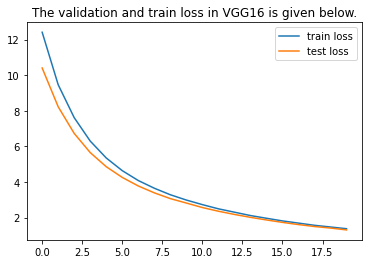

************************************************************************************************************************ 



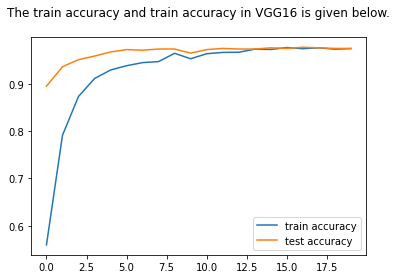

In [44]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss in VGG16 is given below.')
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*120,'\n')

plt.title('The train accuracy and train accuracy in VGG16 is given below.\n')
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

In [45]:
##### Classification report of this dataset #####
print(classification_report(predicted_, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       192
           1       0.95      0.96      0.96       212
           2       0.96      0.98      0.97       203
           3       0.99      0.97      0.98       193

    accuracy                           0.97       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.97      0.98       800



[[191   1   0   0]
 [  0 203   8   1]
 [  0   4 198   1]
 [  0   5   0 188]]
************************************************************************************************************************ 




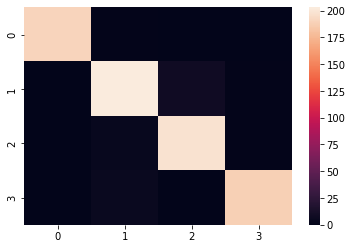

In [46]:
##### Show the confution matrix of this model for evalution #####
print(confusion_matrix(predicted_, y_test))

print('*'*120,'\n\n')

sns.heatmap(confusion_matrix(predicted_, y_test))
plt.show()

1/1 [==============================] - 0s 23ms/step


'Polyps'

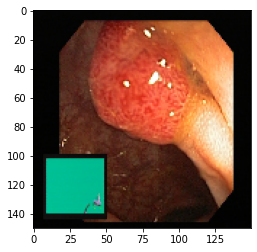

In [52]:
import keras.utils as image
class colon_cancer:

  def __init__(self, image_):
    self.image = image_

  def prediction(self):
    ##### Load the image #####
    Image_ = image.load_img(self.image, target_size = (150, 150))
    plt.imshow(Image_)
    ##### Convert this image to Numpy array #####
    Image_array_ = image.img_to_array(Image_)
    ##### Normalized the array #####
    Image_array_numpy = (Image_array_/255)
    test_data = np.expand_dims(Image_array_numpy, axis = 0)
    predicted_ =  model.predict(test_data)
    predicted_ = np.argmax(predicted_, axis = 1)
    if predicted_[0] == 0:
      return 'Normal'
    elif predicted_[0] == 1:
      return 'Ulcer'
    elif predicted_[0] == 2:
      return 'Polyps'
    else:
      return 'Esophagitis'

col = colon_cancer('/content/Colon Cancer/colon_cancer/2_polyps/test_polyps_ (24).jpg')
col.prediction()

Use ResNet 

In [61]:
##### Import the ResNet50 #####
from tensorflow.keras.applications import ResNet50
##### Call the ResNet50 #####
ResNet_ = ResNet50(weights = 'imagenet', include_top = False, classes = 4, input_shape = X_numpy.shape[1:])

##### Set the trainable parameter False #####
ResNet_.trainable = False

##### Plot the summary #####
ResNet_.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [62]:
##### Create the sequential model #####
model = Sequential()

##### Add this VGG16 into the sequential model #####
model.add(ResNet_)

##### Flatten the model for the fully connected layer #####
model.add(Flatten())

##### Create first hidden layer with 512 neurons #####
model.add(Dense(units = 256, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

##### Create second hidden layer with 128 neurons #####
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

##### Create the output layer #####
model.add(Dense(units = 4, activation = 'softmax'))


##### Compile the model and run #####
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

##### plot the model summary #####
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 dense_15 (Dense)            (None, 256)               13107456  
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 4)                 516       
                                                                 
Total params: 36,728,580
Trainable params: 13,140,868
Non-trainable params: 23,587,712
_________________________________________________________________


In [64]:
##### Fit the model and run #####
history_ = model.fit(x = X_train, y = y_train, batch_size = 64, epochs = 50, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/50
50/50 [==============================] - 7s 131ms/step - loss: 1.1486 - accuracy: 0.9087 - val_loss: 1.1236 - val_accuracy: 0.9150
Epoch 2/50
50/50 [==============================] - 6s 127ms/step - loss: 1.1034 - accuracy: 0.9156 - val_loss: 1.0820 - val_accuracy: 0.9162
Epoch 3/50
50/50 [==============================] - 6s 129ms/step - loss: 1.0612 - accuracy: 0.9175 - val_loss: 1.1703 - val_accuracy: 0.8413
Epoch 4/50
50/50 [==============================] - 6s 131ms/step - loss: 1.0274 - accuracy: 0.9244 - val_loss: 1.0162 - val_accuracy: 0.9175
Epoch 5/50
50/50 [==============================] - 7s 132ms/step - loss: 0.9869 - accuracy: 0.9306 - val_loss: 0.9901 - val_accuracy: 0.9150
Epoch 6/50
50/50 [==============================] - 7s 132ms/step - loss: 0.9430 - accuracy: 0.9394 - val_loss: 0.9630 - val_accuracy: 0.9187
Epoch 7/50
50/50 [==============================] - 7s 131ms/step - loss: 0.9208 - accuracy: 0.9328 - val_loss: 0.9627 - val_accuracy: 0.9112
Epoch 

In [68]:
##### Show the performance of this model #####
predicted_ = model.predict(X_test)

predicted_ = np.argmax(predicted_, axis = 1)
print('\nEvalution of model in Average = Macro in ResNet.\n\n')
print('The accuracy score of this dataset is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision score of this dataset is = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The recall score of this dataset is = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The F1 score of this dataset is = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n'))

print('*'*120)

print('\nEvalution of model in Average = Micro in ResNet.\n\n')
print('The accuracy score of this dataset is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision score of this dataset is = {} '.format(precision_score(predicted_, y_test, average = 'micro'),'\n'))
print('The recall score of this dataset is = {} '.format(recall_score(predicted_, y_test, average = 'micro'),'\n'))
print('The F1 score of this dataset is = {} '.format(f1_score(predicted_, y_test, average = 'micro'),'\n'))

25/25 [==============================] - 1s 53ms/step

Evalution of model in Average = Macro in ResNet.


The accuracy score of this dataset is  = 0.9375 
The precision score of this dataset is = 0.9389440458112326 
The recall score of this dataset is = 0.9408117456204024 
The F1 score of this dataset is = 0.9388864920996516 
************************************************************************************************************************

Evalution of model in Average = Micro in ResNet.


The accuracy score of this dataset is  = 0.9375 
The precision score of this dataset is = 0.9375 
The recall score of this dataset is = 0.9375 
The F1 score of this dataset is = 0.9375 


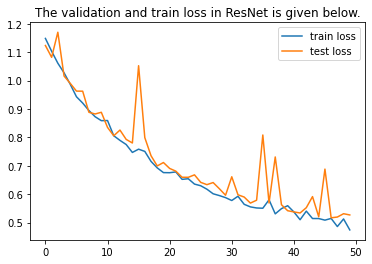

************************************************************************************************************************ 



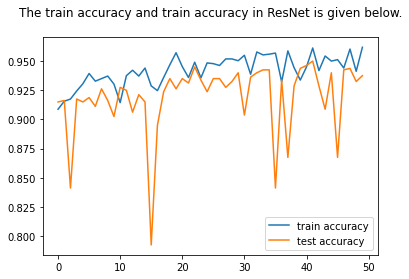

In [67]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss in ResNet is given below.')
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*120,'\n')

plt.title('The train accuracy and train accuracy in ResNet is given below.\n')
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

Use InceptionNet to evaluate the performance

In [70]:
##### Import the InceptionResNet from the keras #####
from tensorflow.keras.applications import InceptionResNetV2
InceptionNet_ = InceptionResNetV2(include_top = False, weights = 'imagenet', classes = 4, input_shape = X_numpy.shape[1:])

##### Set the trainable parameters = False #####
InceptionNet_.trainable = False

##### Plot the summary #####
InceptionNet_.summary()

219055592/219055592 [==============================] - 1s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_205 (Conv2D)            (None, 74, 74, 32)   864         ['input_13[0][0]']               
                                                                                                  
 batch_normalization_203 (Batch  (None, 74, 74, 32)  96          ['conv2d_205[0][0]']             
 Normalization)                                                                                   
             

In [73]:
##### Create the sequential model #####
model = Sequential()

##### Add this InceptionNetV2 into the sequential model #####
model.add(InceptionNet_)

##### Flatten the model for the fully connected layer #####
model.add(Flatten())

##### Create first hidden layer with 512 neurons #####
model.add(Dense(units = 512, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

##### Create second hidden layer with 256 neurons #####
model.add(Dense(units = 256, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

##### Use the Dropout Layer with p = 0.5 #####
model.add(Dropout(0.5))

##### Create the output layer #####
model.add(Dense(units = 4, activation = 'softmax'))


##### Compile the model and run #####
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

##### plot the model summary #####
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 3, 3, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 13824)             0         
                                                                 
 dense_21 (Dense)            (None, 512)               7078400   
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 1028      
                                                      

In [74]:
##### Fit the model and run #####
history_ = model.fit(x = X_train, y = y_train, batch_size = 64, epochs = 50, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/50
50/50 [==============================] - 21s 226ms/step - loss: 15.7192 - accuracy: 0.7628 - val_loss: 14.6284 - val_accuracy: 0.9362
Epoch 2/50
50/50 [==============================] - 8s 166ms/step - loss: 14.1091 - accuracy: 0.9319 - val_loss: 13.4945 - val_accuracy: 0.9538
Epoch 3/50
50/50 [==============================] - 8s 168ms/step - loss: 12.9534 - accuracy: 0.9581 - val_loss: 12.4296 - val_accuracy: 0.9575
Epoch 4/50
50/50 [==============================] - 8s 169ms/step - loss: 11.8963 - accuracy: 0.9706 - val_loss: 11.4078 - val_accuracy: 0.9675
Epoch 5/50
50/50 [==============================] - 8s 168ms/step - loss: 10.9205 - accuracy: 0.9750 - val_loss: 10.4893 - val_accuracy: 0.9625
Epoch 6/50
50/50 [==============================] - 8s 167ms/step - loss: 10.0409 - accuracy: 0.9753 - val_loss: 9.6663 - val_accuracy: 0.9575
Epoch 7/50
50/50 [==============================] - 8s 166ms/step - loss: 9.2048 - accuracy: 0.9887 - val_loss: 8.8854 - val_accuracy: 0

In [78]:
##### Show the performance of this model #####
predicted_ = model.predict(X_test)

predicted_ = np.argmax(predicted_, axis = 1)
print('\nEvalution of model in Average = Macro in InceptionNetV2.\n\n')
print('The accuracy score of this dataset is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision score of this dataset is = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The recall score of this dataset is = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The F1 score of this dataset is = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n'))

print('*'*120)

print('\nEvalution of model in Average = Micro in InceptionNetV2.\n\n')
print('The accuracy score of this dataset is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision score of this dataset is = {} '.format(precision_score(predicted_, y_test, average = 'micro'),'\n'))
print('The recall score of this dataset is = {} '.format(recall_score(predicted_, y_test, average = 'micro'),'\n'))
print('The F1 score of this dataset is = {} '.format(f1_score(predicted_, y_test, average = 'micro'),'\n'))

25/25 [==============================] - 2s 78ms/step

Evalution of model in Average = Macro in InceptionNetV2.


The accuracy score of this dataset is  = 0.97625 
The precision score of this dataset is = 0.9772957194709734 
The recall score of this dataset is = 0.9770150910025628 
The F1 score of this dataset is = 0.9769226574036783 
************************************************************************************************************************

Evalution of model in Average = Micro in InceptionNetV2.


The accuracy score of this dataset is  = 0.97625 
The precision score of this dataset is = 0.97625 
The recall score of this dataset is = 0.97625 
The F1 score of this dataset is = 0.97625 


In [84]:
##### Show the confusion matrix of this InceptionResNetV2 #####
print('The confusion matrix of this InceptionResNetV2 is given below.\n')
print(confusion_matrix(predicted_, y_test))

The confusion matrix of this InceptionResNetV2 is given below.

[[191   0   0   0]
 [  0 199   3   1]
 [  0  10 203   1]
 [  0   4   0 188]]


In [85]:
##### Show the classification report of this InceptionResNetV2 #####
print('The classification report of this InceptionResNetV2 is given below.\n')
print(classification_report(predicted_, y_test))

The classification report of this InceptionResNetV2 is given below.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       0.93      0.98      0.96       203
           2       0.99      0.95      0.97       214
           3       0.99      0.98      0.98       192

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



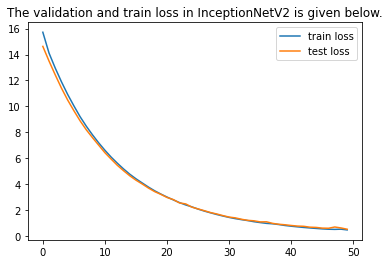

************************************************************************************************************************ 



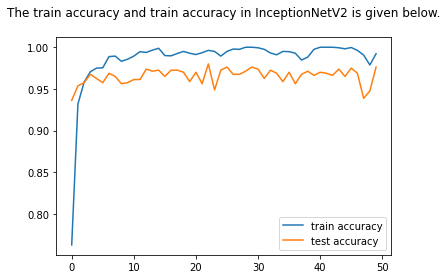

In [77]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss in InceptionNetV2 is given below.')
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*120,'\n')

plt.title('The train accuracy and train accuracy in InceptionNetV2 is given below.\n')
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

In [82]:
##### Comments after analysis #####
print(
'''
VGG16, InceptionNetV2 and my own model works very well with this dataset. The model that I will build that would be combination of my Own Model and InceptionResNetV2.
''')


VGG16, InceptionNetV2 and my own model works very well with this dataset. The model that I will build that would be combination of my Own Model and InceptionResNetV2.



Use InceptionResNetV2 to build our model to predict that Colon Cancer for our Software Engineering Project.

In [86]:
##### Split the dataset into train and test again with test_size = 0.30 #####
X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size = 0.30, random_state = 42, shuffle = True)

print('The shape of X train of the dataset is = {}'.format(X_train.shape),'\n')
print('The shape of y train of the dataset is = {}'.format(y_train.shape),'\n')
print('The shape of X test  of the dataset is = {}'.format(X_test.shape),'\n')
print('The shape of y test  of the dataset is = {}'.format(y_test.shape),'\n')

The shape of X train of the dataset is = (2800, 150, 150, 3) 

The shape of y train of the dataset is = (2800,) 

The shape of X test  of the dataset is = (1200, 150, 150, 3) 

The shape of y test  of the dataset is = (1200,) 



In [91]:
##### Call the InceptionRestNetV2 object with the desired parameters #####
try:
  InceptionResNetV2_ = InceptionResNetV2(include_top = False,\
                                        weights     = 'imagenet',\
                                        input_shape = (X_numpy.shape[1:]),\
                                        classes     = 4)
except Exception as e:
  print(e.with_traceback)
else:
  print('InceptionResNetV2 object downloaded is done successfuly.\n\n')

  ##### Make the trainable parameters = False as we will use their imagenet weights to train our model #####
  InceptionResNetV2_.trainable = False

  ##### Show the InceptionResNetV2 summary #####
  InceptionResNetV2_.summary()

InceptionResNetV2 object downloaded is done successfuly.


Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1220 (Conv2D)           (None, 74, 74, 32)   864         ['input_18[0][0]']               
                                                                                                  
 batch_normalization_1218 (Batc  (None, 74, 74, 32)  96          ['conv2d_1220[0][0]']            
 hNormalization)                                                                                  
                     

In [95]:
##### Plot this model summary in a diagram #####
plot_model(InceptionResNetV2_)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.591003 to fit



In [99]:
try:
  ##### Create the Sequential Model #####
  model = Sequential()

  ##### InceptionResNetV2 objects should be added into the Sequential model for training #####
  model.add(InceptionResNetV2_)

  ##### Do the Flatten the layer for applying Fully Connected Layer #####
  model.add(Flatten())

  ##### Create first hidden layer with 128 neurons with L2() regularization #####
  model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

  ##### Use the BatchNormalization Technique to Normalised their distribution #####
  model.add(BatchNormalization())

  ##### Create second hidden layer with 64 neurons with L2() regularization #####
  model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

  ##### Use the Dropout layer with p = 0.6 #####
  model.add(Dropout(rate = 0.5))

  ##### Create the output layer with softmax #####
  model.add(Dense(units = 4, activation = 'softmax'))

  ##### Compile the model and check #####
  model.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

except Exception as e:
  print(e.with_traceback)

else:
  ##### Plot the model summary #####
  model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 3, 3, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 13824)             0         
                                                                 
 dense_27 (Dense)            (None, 128)               1769600   
                                                                 
 batch_normalization_1422 (B  (None, 128)              512       
 atchNormalization)                                              
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)             

In [100]:
##### Fit the model of InceptionNetV2 and check the performance #####
history_ = model.fit(x = X_train, y = y_train, batch_size = 128, epochs = 20, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/20
22/22 [==============================] - 20s 491ms/step - loss: 5.9542 - accuracy: 0.6736 - val_loss: 5.3489 - val_accuracy: 0.8958
Epoch 2/20
22/22 [==============================] - 8s 351ms/step - loss: 5.3008 - accuracy: 0.8971 - val_loss: 5.1615 - val_accuracy: 0.9267
Epoch 3/20
22/22 [==============================] - 8s 355ms/step - loss: 5.1115 - accuracy: 0.9429 - val_loss: 5.0109 - val_accuracy: 0.9467
Epoch 4/20
22/22 [==============================] - 8s 360ms/step - loss: 4.9710 - accuracy: 0.9579 - val_loss: 4.8906 - val_accuracy: 0.9558
Epoch 5/20
22/22 [==============================] - 8s 359ms/step - loss: 4.8363 - accuracy: 0.9700 - val_loss: 4.7941 - val_accuracy: 0.9525
Epoch 6/20
22/22 [==============================] - 8s 354ms/step - loss: 4.7125 - accuracy: 0.9800 - val_loss: 4.6593 - val_accuracy: 0.9700
Epoch 7/20
22/22 [==============================] - 8s 350ms/step - loss: 4.5895 - accuracy: 0.9843 - val_loss: 4.5562 - val_accuracy: 0.9683
Epoch

In [101]:
##### Show the performance of InceptionNetV2 model #####
predicted_ = model.predict(X_test)

predicted_ = np.argmax(predicted_, axis = 1)
print('\nEvalution of model in Average = Macro in InceptionNetV2.\n\n')
print('The accuracy score of this dataset is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision score of this dataset is = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The recall score of this dataset is = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The F1 score of this dataset is = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n'))

print('*'*120)

print('\nEvalution of model in Average = Micro in InceptionNetV2.\n\n')
print('The accuracy score of this dataset is  = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision score of this dataset is = {} '.format(precision_score(predicted_, y_test, average = 'micro'),'\n'))
print('The recall score of this dataset is = {} '.format(recall_score(predicted_, y_test, average = 'micro'),'\n'))
print('The F1 score of this dataset is = {} '.format(f1_score(predicted_, y_test, average = 'micro'),'\n'))

38/38 [==============================] - 7s 94ms/step

Evalution of model in Average = Macro in InceptionNetV2.


The accuracy score of this dataset is  = 0.9741666666666666 
The precision score of this dataset is = 0.9734176726952812 
The recall score of this dataset is = 0.973667710249133 
The F1 score of this dataset is = 0.9733823951926418 
************************************************************************************************************************

Evalution of model in Average = Micro in InceptionNetV2.


The accuracy score of this dataset is  = 0.9741666666666666 
The precision score of this dataset is = 0.9741666666666666 
The recall score of this dataset is = 0.9741666666666666 
The F1 score of this dataset is = 0.9741666666666666 


In [102]:
##### Show the confusion matrix of this InceptionResNetV2 #####
print('The confusion matrix of this InceptionResNetV2 is given below.\n')
print(confusion_matrix(predicted_, y_test))

The confusion matrix of this InceptionResNetV2 is given below.

[[317   1   0   0]
 [  0 278  17   3]
 [  0   7 273   1]
 [  0   1   1 301]]


In [103]:
##### Show the classification report of this InceptionResNetV2 #####
print('The classification report of this InceptionResNetV2 is given below.\n')
print(classification_report(predicted_, y_test))

The classification report of this InceptionResNetV2 is given below.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       0.97      0.93      0.95       298
           2       0.94      0.97      0.95       281
           3       0.99      0.99      0.99       303

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



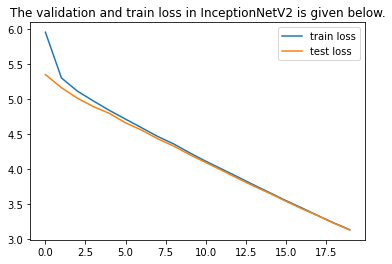

************************************************************ 



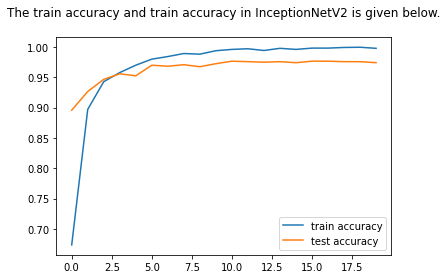

In [105]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss in InceptionNetV2 is given below.')
plt.plot(history_.history['loss'], label = 'train loss')
plt.plot(history_.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*60,'\n')

plt.title('The train accuracy and train accuracy in InceptionNetV2 is given below.\n')
plt.plot(history_.history['accuracy'], label = 'train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

Build the model for single user input for our Project

1/1 [==============================] - 0s 48ms/step


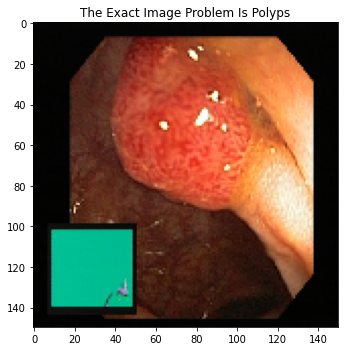

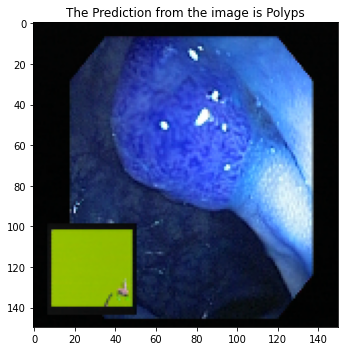

In [120]:
class colon_cancer_project:

  def __init__(self, image_):
    self.image  = image_
    self.figure = plt.figure(figsize = (12, 12))

  def prediction(self):
    ##### Load the image #####
    Image_ = image.load_img(self.image, target_size = (150, 150))
    ax1 = self.figure.add_subplot(1, 2, 1)
    ax1.set_title('The exact image problem is {}'.format(self.image.split('_')[3]).title())
    ax1.imshow(Image_)
    ##### Convert this image to Numpy array #####
    Image_array_ = image.img_to_array(Image_)
    ##### Normalized the array #####
    Image_array_numpy = (Image_array_/255)
    test_data = np.expand_dims(Image_array_numpy, axis = 0)
    predicted_ =  model.predict(test_data)
    predicted_ = np.argmax(predicted_, axis = 1)
    if predicted_[0] == 0:
      return 'Normal'
    elif predicted_[0] == 1:
      return 'Ulcer'
    elif predicted_[0] == 2:
      return 'Polyps'
    else:
      return 'Esophagitis'

cancer_object = colon_cancer_project('/content/Colon Cancer/colon_cancer/2_polyps/test_polyps_ (24).jpg')
result = cancer_object.prediction()
figure_ = plt.figure(figsize = (12, 12))
ax2 = figure_.add_subplot(1, 2, 2)
ax2.set_title('The Prediction from the image is {}'.format(result))
ax2.imshow(cv2.resize(cv2.imread('/content/Colon Cancer/colon_cancer/2_polyps/test_polyps_ (24).jpg'), (150, 150)))
plt.show()